## Fitting a Model to Data I

In [1]:
# Preamble

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["olivedrab", "steelblue", "firebrick", "goldenrod"]) 
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.frameon'] = False
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

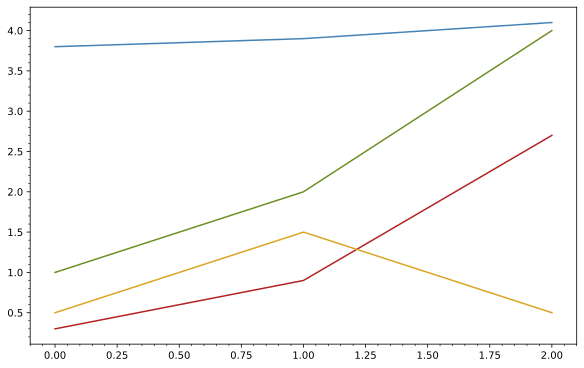

In [2]:
plt.plot([1, 2, 4])
plt.plot([3.8, 3.9, 4.1])
plt.plot([0.3, 0.9, 2.7])
plt.plot([0.5, 1.5, 0.5])
plt.show()
plt.close()